In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define the quadratic loss finction
def quadratic_loss(x , y):
    return x**2 + 10*y**2

In [3]:
#Gradient of the loss function
def quadratic_loss_gradient(x, y):
    dx = 2 * x
    dy = 20 * y
    return np.array([dx, dy])

In [10]:
#Def vanilla gradient descent
def gradient_descent(grad_func, lr, epochs, start_point):
    x, y = start_point
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x , y)
        x = x - lr*grad[0]
        y = y - lr*grad[1]
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses

In [5]:
#Rms Prop algorithm
def rmsprop_optimizer(grad_func, lr, beta, epsilon, epochs, start_point):
    x, y = start_point
    Eg2 = np.array([0.0, 0.0]) #moving average of sqaured gradients
    path = [(x, y)]
    losses = [quadratic_loss(x, y)]
    
    for _ in range(epochs):
        grad = grad_func(x, y)
        Eg2 = beta * Eg2 + (1 - beta) * grad**2
        
        x = x - lr * grad[0] / (np.sqrt(Eg2[0]) + epsilon)
        y = y - lr * grad[1] / (np.sqrt(Eg2[1]) + epsilon)
        path.append((x, y))
        losses.append(quadratic_loss(x, y))
        
    return np.array(path), losses     

In [13]:
#Visualize the optimization path
def plot_paths(function, paths, labels, title='Optimization Paths: GD vs RMSProp'):
    X , Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = function(X, Y)
    
    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis') 
    
    for path, label in zip(paths, labels):  
        plt.plot(path[:, 0], path[:, 1], label=label)
        plt.scatter(path[0, 0], path[0, 1], marker='o', color='red')  # Start point
        plt.scatter(path[-1, 0], path[-1, 1], marker='x', color='blue') # End point
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [14]:
def plot_losses(losses, labels, title='Loss Over Iterations: GD vs RMSProp'):
    plt.figure(figsize=(10, 6))
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
#Parameters
lr_gd = 0.1
lr_rmsprop = 0.1
beta = 0.9
epsilon = 1e-8
epochs = 100
start_point = (1.5, 1.5)

In [12]:
#Run optimization algorithms
path_gd, losses_gd = gradient_descent(quadratic_loss_gradient, lr_gd, epochs, start_point)
path_rmsprop, losses_rmsprop = rmsprop_optimizer(quadratic_loss_gradient, lr_rmsprop, beta, epsilon, epochs, start_point)

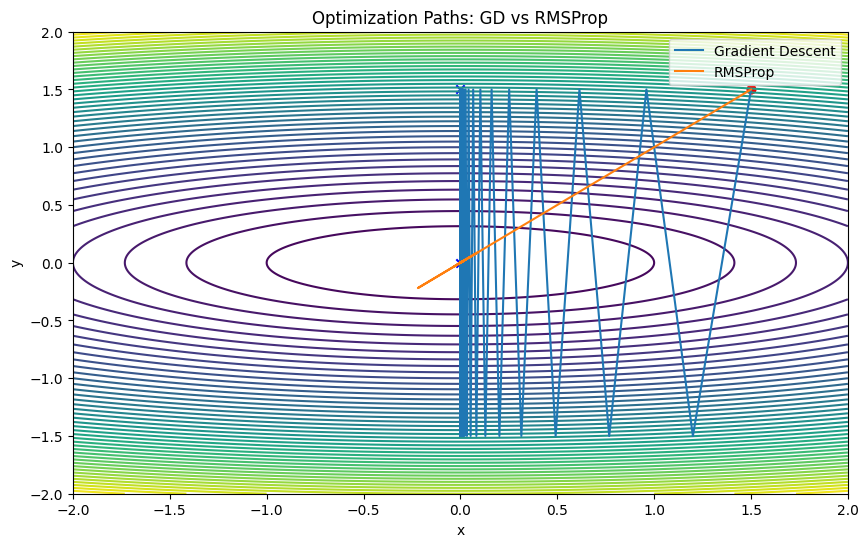

In [15]:
plot_paths(quadratic_loss, [path_gd, path_rmsprop], ['Gradient Descent', 'RMSProp'])

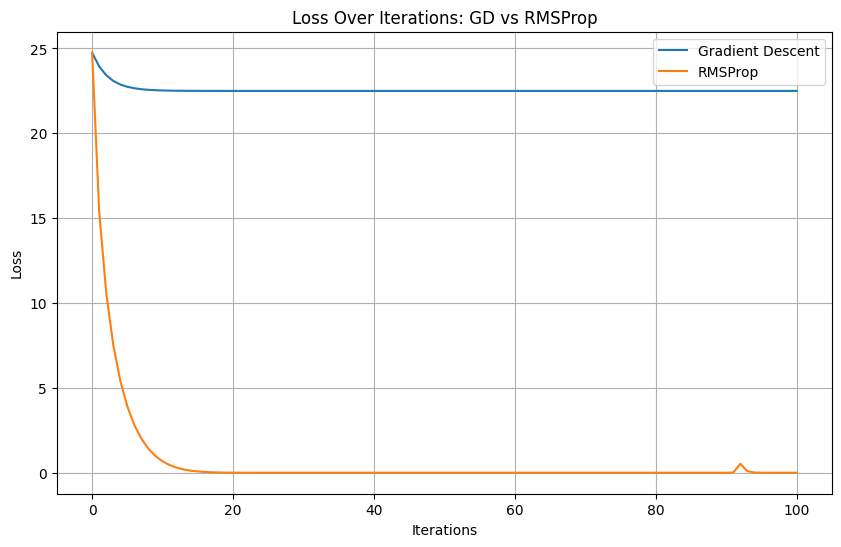

In [16]:
plot_losses([losses_gd, losses_rmsprop], ['Gradient Descent', 'RMSProp'])